## Data Loading

Importing the necessary libraries, like pandas, numpy and some plotting libraries such as matplotlib and seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Set the default font size, figure size and the grid in the plot

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Reading of data as a pandas dataframe and named as **df**

In [3]:
df = pd.read_csv('Walmart.csv')

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**About Data:**
*   Store - the store number
*   Date - the week of sales
*   Weekly_Sales - sales for the given store
*   Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
*   Temperature - Temperature on the day of sale
*   Fuel_Price - Cost of fuel in the region
*   CPI – Prevailing consumer price index
*   Unemployment - Prevailing unemployment rate

**Insights:**

*   Here the target columns is Weekly_Sales.
*   The data is related to walmart store of united state of america. Where **Store**, **Holiday_Flag** are categorical in nature
*   The data is collected over a 45 stores and weekly sales gives the sales of the crossponding store.


## Data Exploration and Modification

In [5]:
df.info() # it gives the information (like count and data type) of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Here Date columns is **object** and other remain columns are **interger or float** in nature. Now using the pandas I change the date column datatype(i.e. object) into a pandas-datetime.

In [6]:
df.Date=pd.to_datetime(df.Date)

<ipython-input-6-e56517284519>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Date=pd.to_datetime(df.Date)


Using the date column i create three seperate columns of weekday, month and year and added to the existing dataset.

In [7]:
df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

Now I drop the date columns because of no use of it.

In [8]:
df.drop(['Date'], axis=1, inplace=True)

Hence the modified dataset is look like:

In [9]:
df.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010


Explored the unique values of the weekday, month and year columns as follows:

In [10]:
print('years unique value', df.year.unique())
print('months unique value', df.month.unique())
print('weekday unique value', df.weekday.unique())

years unique value [2010 2011 2012]
months unique value [ 5 12  2  3  9  4  7 11  6  8 10  1]
weekday unique value [6 3 4 0 5 1 2]


Months and weekday are as usual, but the data is taken from year 2010, 2011, 2012 only.

Now to get the idea of distribution of the dataset, I used describe function which gives a table of various statistical values of all the columns

In [11]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


**Insights:**
*   Temperature - has values ranges from (-2, 100.1) Fahrenhite.
*   CPI - is ranges from 126 to 227 with a standard deviation of 39.35
*   Unemployment - is ranges from 3.87 to 14.31 with a standard deviation of 1.87

In [12]:
original_df = df.copy() # made the copy of dataframe to check the dublicates values in the dataset

Checking of dublicates values :

In [13]:
counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('The dataset doesn\'t have any duplicates')
else:
    print('Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')

The dataset doesn't have any duplicates


Checking of missing values :

In [14]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

Dataset doesn't have null values

## Data Visualization

In [15]:
df.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010


Here we have:

**Numerical columns:** Weekly_sales, temperature, fuel_price, cpi, unemployment

**Categorical columns:** Holiday_flag, Weekday, month, year

Now plotted the count plot to get the distribution or frequency of the columns

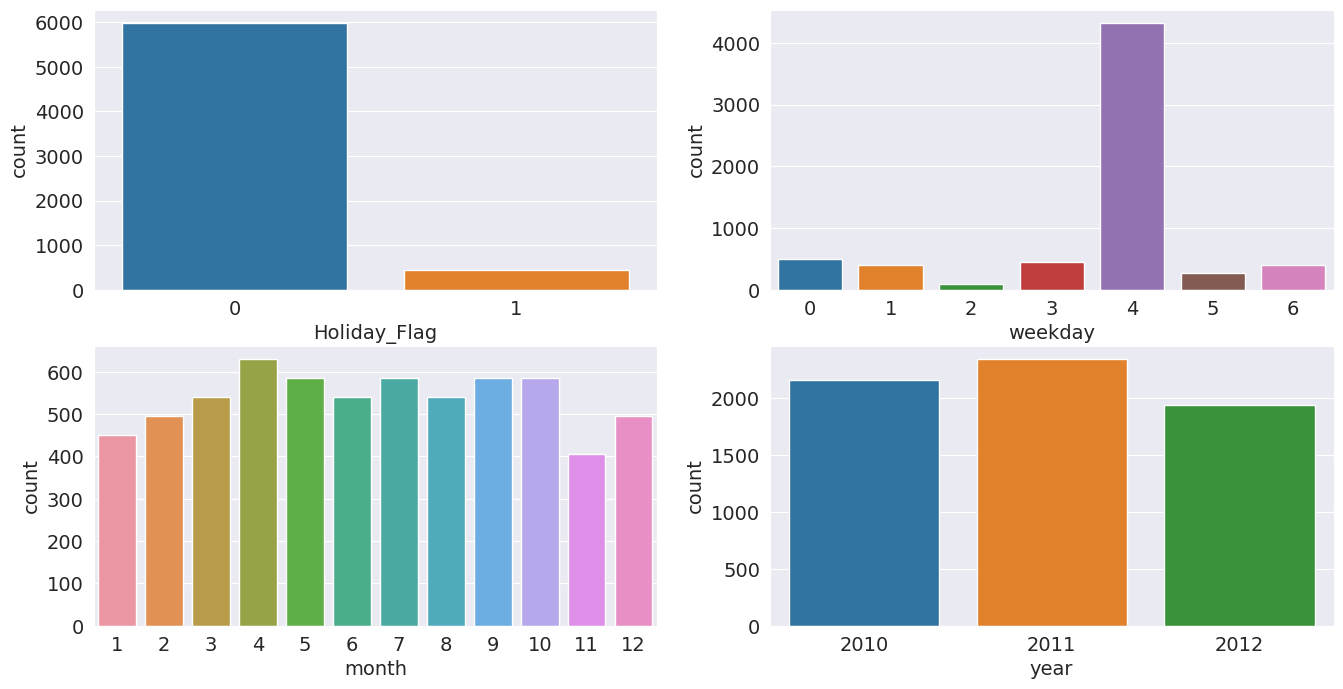

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#axes[0,0].set_title('Holiday Count plot')
sns.countplot(x='Holiday_Flag', data=df, ax= axes[0,0])

#axes[0,1].set_title('Weekday Count plot')
sns.countplot(x='weekday', data=df, ax= axes[0,1]);

#axes[1,0].set_title('month Count plot')
sns.countplot(x='month', data=df, ax= axes[1,0]);

#axes[1,1].set_title('year Count plot')
sns.countplot(x='year', data=df, ax= axes[1,1]);

**Insights:**

*   In Holiday flag most of the time there is no holiday in that week.
*   In weekdays columns observations are mostly related to the day 4
*   Most of the observation in the data is from the month of april
*   Most of the observation in the data is from year 2011

To get the idea of how many observations are there in dataset crossponding to each store, I again plot a count plot.

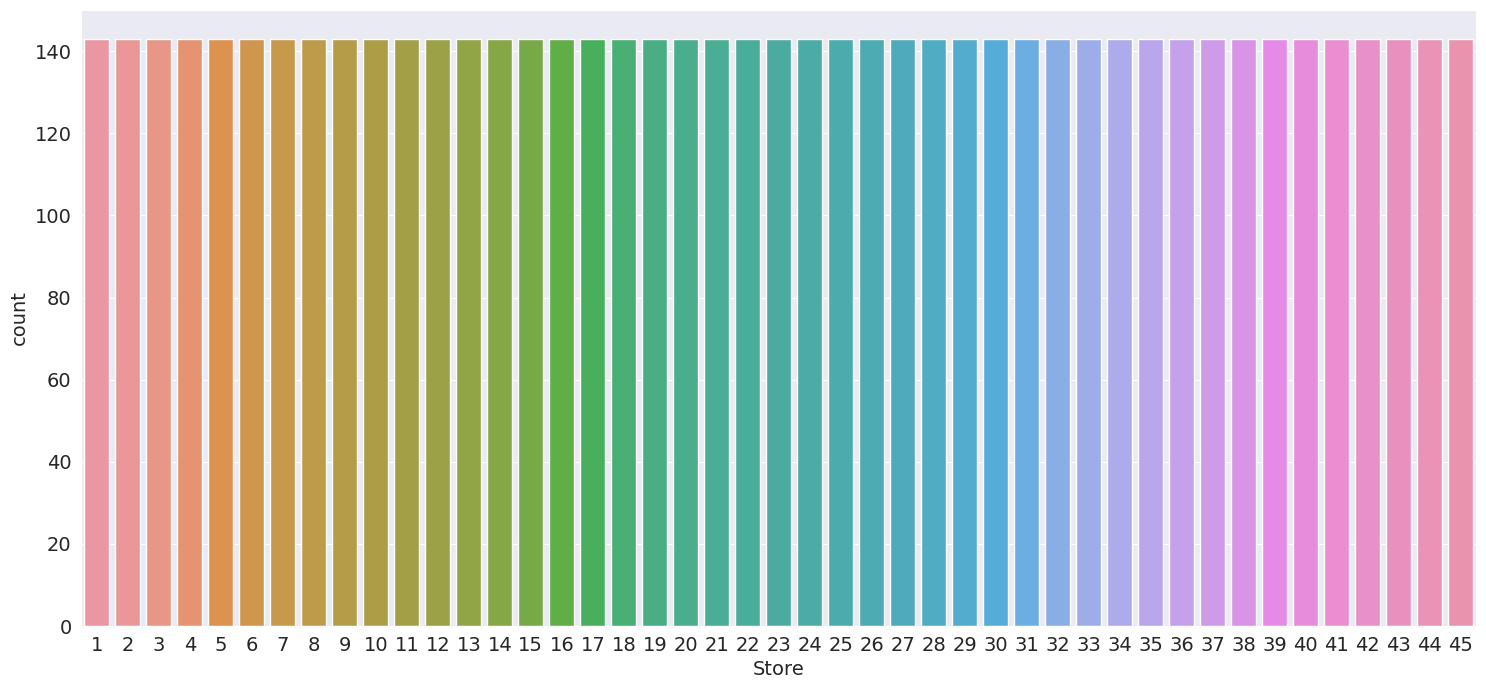

In [17]:
plt.figure(figsize= (18,8))
sns.countplot(x= 'Store', data= df);
plt.show()

All the store have equal number of data in the set

In [18]:
df.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.9,0,42.31,2.572,211.096358,8.106,6,5,2010


To analyze the distribution of the data, I plotted the histogram and boxplot for Temperature, Unemployment, Fuel_Price, CPI.

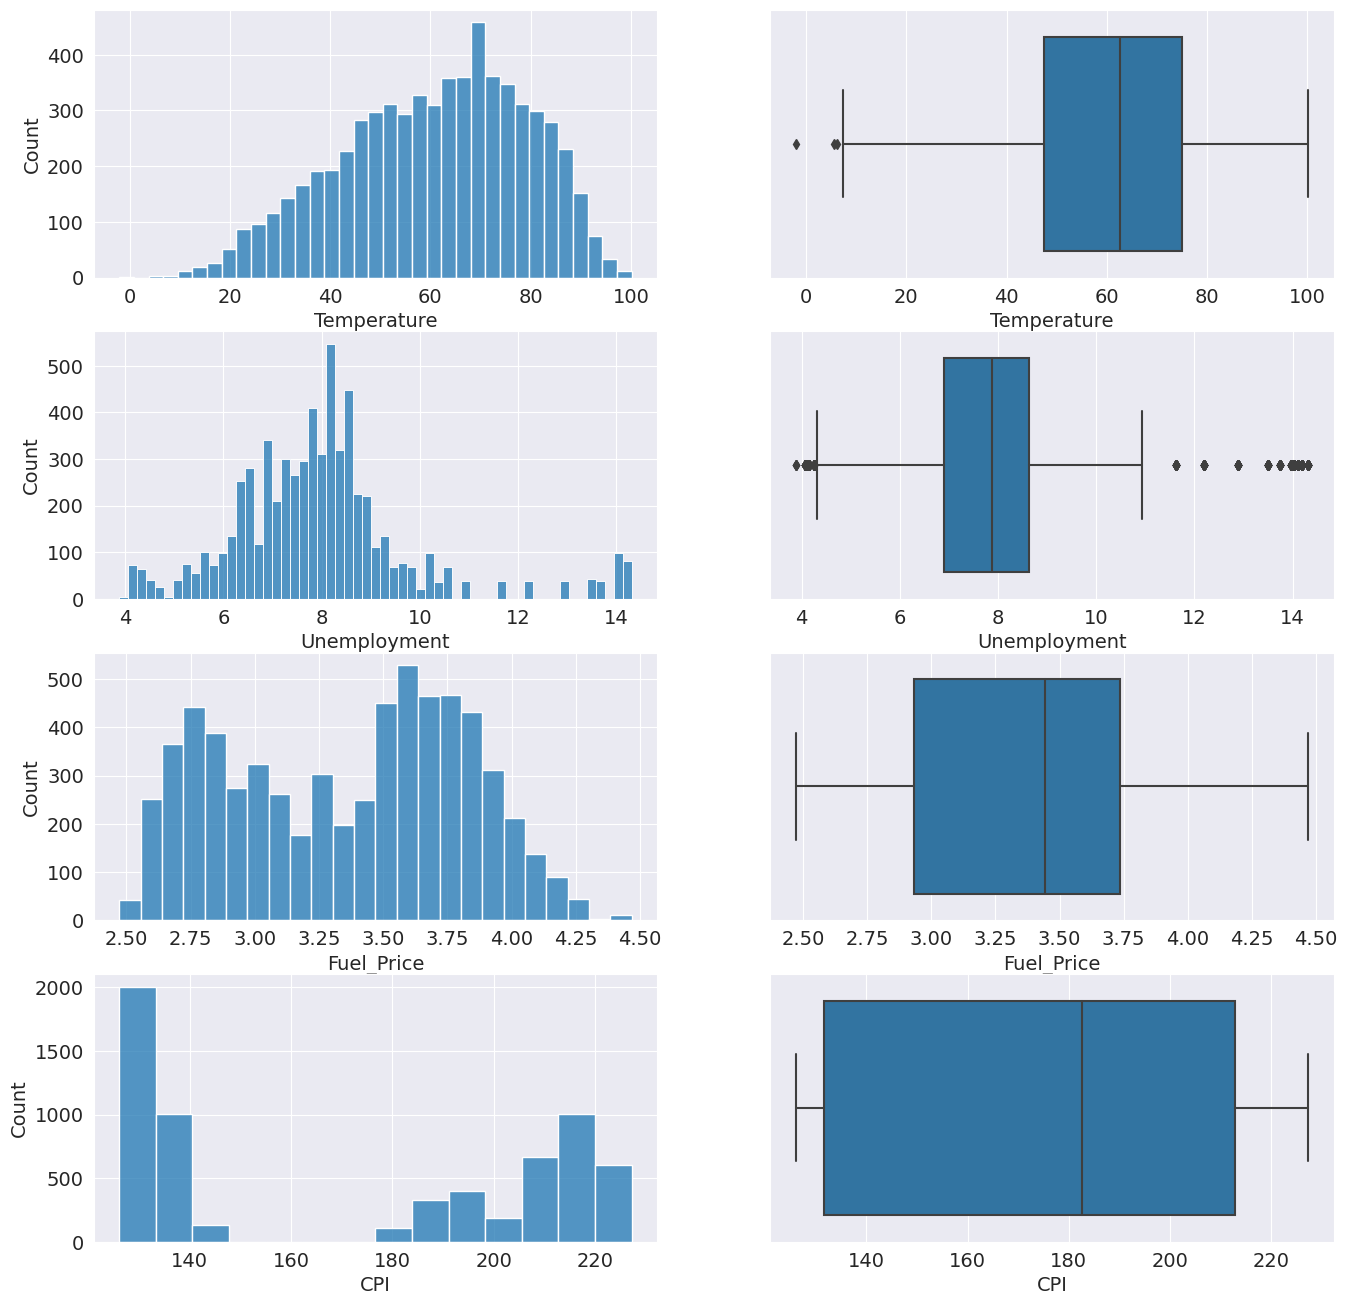

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
# axes[0,0].set_title('Temperature')
sns.histplot(x= 'Temperature', data= df, ax= axes[0,0])

sns.boxplot(x= 'Temperature', data= df, ax= axes[0,1])

# axes[1,0].set_title('Unemployment')
sns.histplot(x= 'Unemployment', data= df, ax= axes[1,0])

sns.boxplot(x= 'Unemployment', data= df, ax= axes[1,1])

# axes[2,0].set_title('Fuel_Price')
sns.histplot(x= 'Fuel_Price', data= df, ax= axes[2,0])

sns.boxplot(x = 'Fuel_Price', data= df, ax= axes[2,1])

# axes[3,0].set_title('CPI')
sns.histplot(x= 'CPI', data= df, ax= axes[3,0])

sns.boxplot(x= 'CPI', data= df, ax= axes[3,1]);

**Insights:**

*   Temperature:  Crossponding to the lower temperature, there is a presence of outlier.
*   Umemployment: The outlier is present in the dataset crossponding to higher and lower both values.
*   CPI: It is either very low or very high.

In [20]:
# Removing the outlier from Temperature column

Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
df = df[df['Temperature'] <= (Q3+(1.5*IQR))]
df = df[df['Temperature'] >= (Q1-(1.5*IQR))]

In [21]:
# Removing the outlier from Unemployment column

Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1
df = df[df['Unemployment'] <= (Q3+(1.5*IQR))]
df = df[df['Unemployment'] >= (Q1-(1.5*IQR))]

In [22]:
df.shape

(5951, 10)

On the process of removing outlier, **484 data** points are removed from data-set

## Encoding

Encoding is a process to convert the categorical columns into a numerical columns, as it is not a good preactice to train a model with categorical inputs.

In [23]:
cat_cols = ['Store', 'Holiday_Flag', 'weekday', 'month', 'year'] # these are the categorical columns

In [24]:
df[cat_cols].nunique() # Counting the unique value in each of the categorical columns.

Store           45
Holiday_Flag     2
weekday          7
month           12
year             3
dtype: int64

In [25]:
# Imported OneHotEncoder to perfrom the encoding
from sklearn.preprocessing import OneHotEncoder
# Creating a object of the encoder function
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# Fit the encoder object to the dataset which i want to convert into numerical form.
encoder.fit(df[cat_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [26]:
# Creating a list of the encoded columns
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
print(encoded_cols)

['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'year_2010', 'year_2011', 'year_2012']


In [27]:
# Now i added those encoded columns into the original dataset by transforming it into a categorical form.
df[encoded_cols] = encoder.transform(df[cat_cols])

In [28]:
df.shape

(5951, 79)

## Train-Test-Split

Split the dataset into the two part:
1. Training dataset (used to train the model)
2. Testing dataset (used to test the model)

In [33]:
# Drop the sales columns to get the input  features
scaled_df = df
X = scaled_df.drop('Weekly_Sales', axis=1)
# Use the sales column as a target columns
y = scaled_df['Weekly_Sales']

In [34]:
# Importing train test split
from sklearn.model_selection import train_test_split
# dividing the dataset into the train and the test parts and each part has input feature and target features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [35]:
# Printin the shape of all the dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4760, 78), (1191, 78), (4760,), (1191,))

## Feature Selection

Out of all the 78 features all are not important and we have to choose the important feature out of all the features

In [36]:
# import a linear regerssion model
from sklearn.linear_model import LinearRegression
# import a Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
# import a mean squared error for model evaluation
from sklearn.metrics import mean_squared_error
# import a r2 score for model evaluation
from sklearn.metrics import r2_score
# import a RFE model for feature selection
from sklearn.feature_selection import RFE

In [37]:
# Creatint a list to store training and test error
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    # creating a linear regression model object
    lm = LinearRegression()
    # creating a rfe model object with linear regression model and with a parameter of the number of features
    rfe = RFE(lm, n_features_to_select=X_train.shape[1]-i)
    # fitting the rfe model to the trainig dataset
    rfe = rfe.fit(X_train, y_train)
    # creating a linear regression model object for prediction
    LR = LinearRegression()
    # fitted the lr model using the selected features
    LR.fit(X_train.loc[:,rfe.support_], y_train)
    # Made the prediction using the linear regression model
    pred1 = LR.predict(X_train.loc[:,rfe.support_]) # make the prediction on the trainig dataset
    pred2 = LR.predict(X_test.loc[:,rfe.support_]) # make the prediction on the test dataset
    # Insert the mse into the Trr and Tss for train and test respectively
    Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
    Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))

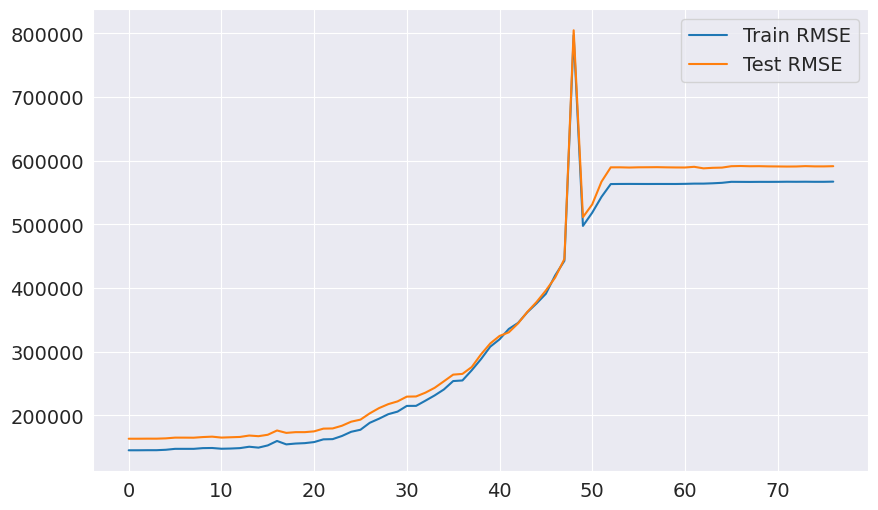

In [38]:
plt.plot(Trr, label= 'Train RMSE')
plt.plot(Tss, label= 'Test RMSE')
plt.legend()
plt.show()

If we Recursively Eleminate at most **Ten** features then the score is maximum.

In [39]:
# Eleminating 10 features and using Linear Regresion model the error printed as follows which is the best possible score.

# creating a linear regression model object
lm = LinearRegression()
# creating a rfe model object with linear regression model and with number of features equal to 10.
rfe = RFE(lm,n_features_to_select=X_train.shape[1]-9)
# fitting the rfe model to the trainig dataset
rfe = rfe.fit(X_train, y_train)
# creating a linear regression model object for prediction
LR = LinearRegression()
# fitted the lr model using the selected features
LR.fit(X_train.loc[:,rfe.support_], y_train)
# Made the prediction using the linear regression model
pred1 = LR.predict(X_train.loc[:,rfe.support_])
pred2 = LR.predict(X_test.loc[:,rfe.support_])
# Printing the results as a MSE and r2_score.
print("MSE train",np.sqrt(mean_squared_error(y_train, pred1)))
print("MSE test",np.sqrt(mean_squared_error(y_test, pred2)))
print("r2_score train - {}".format(r2_score(y_train, pred1)))
print("r2_score test - {}".format(r2_score(y_test, pred2)))

MSE train 148719.01325609005
MSE test 166527.48688591953
r2_score train - 0.9312722139351031
r2_score test - 0.9207696788287851


Now Removing the 10 features and create the New training and test dataset

In [40]:
X_train = X_train.loc[:,rfe.support_]
X_test = X_test.loc[:,rfe.support_]

Now onwards I am going to use various models to predict the output using the Newly created training and test dataset.

## Models

### Linear Regression

In [41]:
# Creating an object for linear regression model
lr =LinearRegression()
# fit the model into traning dataset
lr.fit(X_train, y_train)
#predict the training and test output
pred1 = lr.predict(X_train)
pred2 = lr.predict(X_test)
# calculating and printing the training and test scores
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, pred1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, pred2))))
print("r2_score train {}".format(r2_score(y_train, pred1)))
print("r2_score test {}".format(r2_score(y_test, pred2)))

Root Mean Squared Error train 22117344903.865086
Root Mean Squared Error test 166527.48688591953
r2_score train 0.9312722139351031
r2_score test 0.9207696788287851


### Ridge Regression

In [42]:
# import ridge regression mode
from sklearn.linear_model import Ridge
# Create an object of the model
rr = Ridge()
# fit the model into traning dataset
rr.fit(X_train, y_train)
#predict the training and test output
predrr1 = rr.predict(X_train)
predrr2 = rr.predict(X_test)
# calculating and printing the training and test scores
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, predrr1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, predrr2))))
print("r2_score train {}".format(r2_score(y_train, predrr1)))
print("r2_score test {}".format(r2_score(y_test, predrr2)))

Root Mean Squared Error train 22554465364.487648
Root Mean Squared Error test 168143.34531448942
r2_score train 0.9299138989279068
r2_score test 0.9192246352554937


### Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
# Create an object of the model
lr = Lasso()
# fit the model into traning dataset
lr.fit(X_train, y_train)
#predict the training and test output
predlr1 = lr.predict(X_train)
predlr2 = lr.predict(X_test)
# calculating and printing the training and test scores
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, predlr1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, predlr2))))
print("r2_score train {}".format(r2_score(y_train, predlr1)))
print("r2_score test {}".format(r2_score(y_test, predlr2)))

Root Mean Squared Error train 21741633453.982773
Root Mean Squared Error test 165013.77961263063
r2_score train 0.9324397056146821
r2_score test 0.9222035134089887


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.384e+13, tolerance: 1.532e+11
  model = cd_fast.enet_coordinate_descent(


### ElasticNet Regression

In [44]:
from sklearn.linear_model import ElasticNet
# Create an object of the model
en = ElasticNet()
# fit the model into traning dataset
en.fit(X_train, y_train)
#predict the training and test output
predlr1 = en.predict(X_train)
predlr2 = en.predict(X_test)
# calculating and printing the training and test scores
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, predlr1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, predlr2))))
print("r2_score train {}".format(r2_score(y_train, predlr1)))
print("r2_score test {}".format(r2_score(y_test, predlr2)))

Root Mean Squared Error train 296094303655.7491
Root Mean Squared Error test 568458.948521217
r2_score train 0.07991189516013131
r2_score test 0.0767532762988985


### Polynomial Regression

In [45]:
# Import the polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

To check which degree of freedom is best for the polynomial model, I explore degrees of 2 and 3.

In [46]:
# Creating a list to store the training and test error
Trr = []
Tss = []
# initialize the for loop from 2 to 3
for i in range(2,4):
      # creating an model object with i degree
      poly_reg = PolynomialFeatures(degree = i)
      # fit and transform the features in the training dataset into a polynomial combination of features
      pl_X_train = poly_reg.fit_transform(X_train)
      # fit and transform the features in the testing dataset into a polynomial combination of features
      pl_X_test = poly_reg.fit_transform(X_test)
      # Create a linear regression object
      lr = LinearRegression()
      # fit the model to the polynomial combination of train features
      lr.fit(pl_X_train, y_train)
      # Predict the training output
      pred_poly_train = lr.predict(pl_X_train)
      # insert the error into the training dataset
      Trr.append(np.sqrt(mean_squared_error(y_train, pred_poly_train)))
      # Predict the testing output
      pred_poly_test = lr.predict(pl_X_test)
      # insert the error into the testing dataset
      Tss.append(np.sqrt(mean_squared_error(y_test, pred_poly_test)))

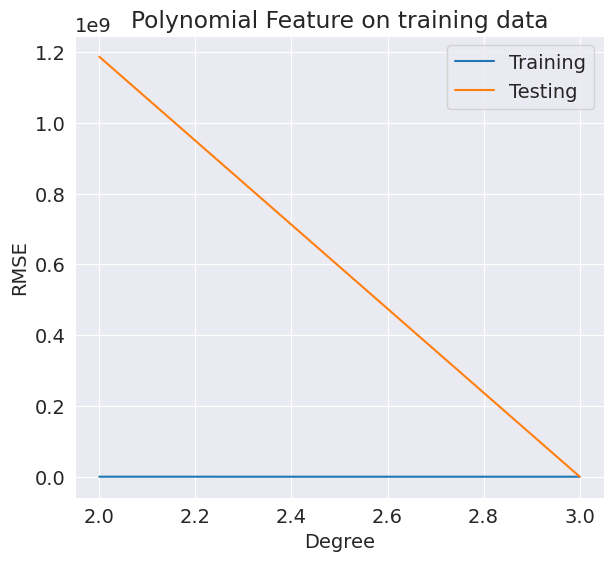

In [47]:
# plot the trainig and test error vs the degree of polynomial
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,4), Trr, label= 'Training')
plt.plot(range(2,4), Tss, label= 'Testing')
plt.title('Polynomial Feature on training data')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()

It is clear that in between 2-4 degree polynomial regression 2 has Bais-variance tradeoff

In [70]:
#  Now Creating a model with the polynomial of degree 3

# Creating and polynomial object
poly_reg = PolynomialFeatures(degree = 3)
# transform the training features into a polynomial combination of train features
pl_X_train = poly_reg.fit_transform(X_train)
# transform the training features into a polynomial combination of train features
pl_X_test = poly_reg.fit_transform(X_test)
# Create an object of the model
lr = LinearRegression()
# fit the model into traning dataset
lr.fit(pl_X_train, y_train)
#predict the training and test output
pred_poly_train = lr.predict(pl_X_train)
pred_poly_test = lr.predict(pl_X_test)
# calculating and printing the training and test scores
print("r2_score train {}".format(r2_score(pred_poly_train, y_train)))
print("r2_score test {}".format(r2_score(pred_poly_test, y_test)))
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, pred_poly_train))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, pred_poly_test))))

r2_score train 0.9863254430488209
r2_score test 0.8291695579933587
Root Mean Squared Error train 4341376950.396851
Root Mean Squared Error test 257963.349362203


It is clear that Linear Regression is the Best Model in the dataset, with test accuracy of 92%(approx).

To improve the accuracy further we can apply other regressor i.e. Random Forest, G

Now I am going to imporve the accuracy till 98% - 99%. For this I have to use Decision Tree or Random Forest etc.

### Decision Tree Regressor

In [53]:
# Importing a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# Create an object of the model
dt = DecisionTreeRegressor()
# fit the model into traning dataset
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
#predict the training and test output
pred_dt1 = dt.predict(X_train)
pred_dt2 = dt.predict(X_test)
# calculating and printing the training and test scores
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_dt1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_dt2))))
print('Accuracy Score train: ', dt.score(X_train, y_train))
print('Accuracy Score test: ', dt.score(X_test, y_test))

RMSE for train 65278.08065420526
RMSE for test 200933.6235533765
Accuracy Score train:  0.9867585935454614
Accuracy Score test:  0.8846480892693763


Now iterate over the depth of 1 to 40 and check at which depth, the accuracy will be maximum.

In [55]:
# Create a list of range from 1 to 39
max_depth_range = np.arange(1,40,1)
for x in max_depth_range:
  # Create a decision tree object with x depth
  dt = DecisionTreeRegressor(max_depth= x)
  # fit the object to the training dataset
  dt.fit(X_train, y_train)
  # Predict the training and test output
  pred_dt1 = dt.predict(X_train)
  pred_dt2 = dt.predict(X_test)
  # Printing the rmse and accuracy for training and testing dataset, crossponding to a sepcific depth
  print('for max_depth: ', x)
  print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_dt1))))
  print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_dt2))))
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

for max_depth:  1
RMSE for train 545014.3239274116
RMSE for test 558419.0260905873
Accuracy Score train:  0.07697131770359622
Accuracy Score test:  0.10907740358184459

for max_depth:  2
RMSE for train 522499.6244356323
RMSE for test 534165.2146014472
Accuracy Score train:  0.15165729644717907
Accuracy Score test:  0.18478762042625152

for max_depth:  3
RMSE for train 497350.2355445843
RMSE for test 507496.1323561573
Accuracy Score train:  0.23135816253777286
Accuracy Score test:  0.26415721832287775

for max_depth:  4
RMSE for train 470553.43378906447
RMSE for test 475829.85282848193
Accuracy Score train:  0.3119543434912492
Accuracy Score test:  0.3531211806084815

for max_depth:  5
RMSE for train 445033.3715870494
RMSE for test 448281.1327366809
Accuracy Score train:  0.3845616987292646
Accuracy Score test:  0.4258564614064363

for max_depth:  6
RMSE for train 417001.54229204264
RMSE for test 417272.3310640809
Accuracy Score train:  0.4596505843831783
Accuracy Score test:  0.5025393

Decision Tree has maximum accuracy at **maximum depth 28** , as training accuracy increases faster than test accuracy.

### Random Forest Regressor

In [56]:
# Import a Random forest regressor
from sklearn.ensemble import RandomForestRegressor
# Create an object of the model
rfc = RandomForestRegressor()
# fit the model into traning dataset
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
#predict the training and test output
pred_rfc1 = rfc.predict(X_train)
pred_rfc2 = rfc.predict(X_test)
# calculating and printing the training and test scores
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_rfc1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_rfc2))))
print('Accuracy Score train: ', dt.score(X_train, y_train))
print('Accuracy Score test: ', dt.score(X_test, y_test))

RMSE for train 79878.42988501117
RMSE for test 168551.0976349762
Accuracy Score train:  0.984504508968948
Accuracy Score test:  0.8884197488120701


In [58]:
# Create a list of range from 1 to 39
max_depth_range = np.arange(1,40,1)
for x in max_depth_range:
  # Create a decision tree object with x depth
  dt = RandomForestRegressor(max_depth= x)
  # fit the object to the training dataset
  dt.fit(X_train, y_train)
  # Predict the training and test output
  pred_xg1 = dt.predict(X_train)
  pred_xg2 = dt.predict(X_test)
  # Printing the rmse and accuracy for training and testing dataset, crossponding to a sepcific depth
  print('for max_depth: ', x)
  print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
  print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

for max_depth:  1
RMSE for train 532225.7881046467
RMSE for test 548523.0160893749
Accuracy Score train:  0.11978008324128742
Accuracy Score test:  0.14037453750916995

for max_depth:  2
RMSE for train 501651.69678267854
RMSE for test 514506.6820400758
Accuracy Score train:  0.21800507470702835
Accuracy Score test:  0.2436869411294389

for max_depth:  3
RMSE for train 475475.54358142975
RMSE for test 484900.8406240146
Accuracy Score train:  0.2974847909955092
Accuracy Score test:  0.32822253012924885

for max_depth:  4
RMSE for train 453049.9946174275
RMSE for test 458225.80004193255
Accuracy Score train:  0.36218956130404223
Accuracy Score test:  0.40010031122659306

for max_depth:  5
RMSE for train 429098.6272099289
RMSE for test 430727.11339037993
Accuracy Score train:  0.4278451101854136
Accuracy Score test:  0.46994128245980427

for max_depth:  6
RMSE for train 410458.7398194613
RMSE for test 410509.00203025725
Accuracy Score train:  0.47647385107720375
Accuracy Score test:  0.518

In the depth of **31** the **Random Forest Regressor** has its maximum value of accuracy. After that it model seems to be overfitted.

In [68]:
# Now create a random forest model at the depth of 36 and make prediction

# Creating an Random Forest Object
rfc = RandomForestRegressor(max_depth = 31)
# Fit the model to the trainig dataset
rfc.fit(X_train, y_train)
#predict the training and test output
pred_rfc1 = rfc.predict(X_train)
pred_rfc2 = rfc.predict(X_test)
# calculating and printing the training and test scores
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_rfc1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_rfc2))))
print('Accuracy Score train: ', rfc.score(X_train, y_train))
print('Accuracy Score test: ', rfc.score(X_test, y_test))

RMSE for train 84708.443928076
RMSE for test 172214.6590509041
Accuracy Score train:  0.9777026746159331
Accuracy Score test:  0.9152655933433324


### XG Boost Regressor

In [60]:
# Import the XGB Regressor
from xgboost import XGBRegressor
# Create an object of the model
xg = XGBRegressor()
# fit the model into traning dataset
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [61]:
#predict the training and test output
pred_xg1 = xg.predict(X_train)
pred_xg2 = xg.predict(X_test)
# calculating and printing the training and test scores
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))

RMSE for train 125950.57105649177
RMSE for test 181124.36302942754


In [62]:
# Create a list of range from 1 to 14

max_depth_range = np.arange(1,15,1)


for x in max_depth_range:
  # Create a decision tree object with x depth
  dt = XGBRegressor(max_depth= x)
  # Fit the model to the trainig dataset
  dt.fit(X_train, y_train)
  # Predict the training and test output
  pred_xg1 = dt.predict(X_train)
  pred_xg2 = dt.predict(X_test)
  # Printing the rmse and accuracy for training and testing dataset, crossponding to a sepcific depth
  print('for max_depth: ', x)
  print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
  print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

for max_depth:  1
RMSE for train 255185.17361079602
RMSE for test 266867.4225805501
Accuracy Score train:  0.7976467240156814
Accuracy Score test:  0.7965251754165059

for max_depth:  2
RMSE for train 194116.22612836442
RMSE for test 214167.38718582146
Accuracy Score train:  0.882909127373765
Accuracy Score test:  0.8689532553416115

for max_depth:  3
RMSE for train 161900.37318417116
RMSE for test 190031.25444462924
Accuracy Score train:  0.9185492545692889
Accuracy Score test:  0.8968261514254144

for max_depth:  4
RMSE for train 148031.41347008938
RMSE for test 186351.9242907797
Accuracy Score train:  0.931906268229969
Accuracy Score test:  0.9007827184380748

for max_depth:  5
RMSE for train 136057.75181278677
RMSE for test 183055.0945897216
Accuracy Score train:  0.9424764149691621
Accuracy Score test:  0.9042622535023248

for max_depth:  6
RMSE for train 125950.57105649177
RMSE for test 181124.36302942754
Accuracy Score train:  0.9507053661063319
Accuracy Score test:  0.906271146

It means **maximun depth 4** has best value of Accuracy. After that models test accuracy remain constant and only train accuracy increases.

In [69]:
# Create an object of the model
xg = XGBRegressor(max_depth = 4)
xg.fit(X_train, y_train)
#predict the training and test output
pred_xg1 = xg.predict(X_train)
pred_xg2 = xg.predict(X_test)
# calculating and printing the training and test scores
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))
print('Accuracy Score train: ', xg.score(X_train, y_train))
print('Accuracy Score test: ', xg.score(X_test, y_test))

RMSE for train 148031.41347008938
RMSE for test 186351.9242907797
Accuracy Score train:  0.931906268229969
Accuracy Score test:  0.9007827184380748


Among the method XGBoost is the best method for the data set

By Comparising the Linear and XGBoost we can conclude that linear Regression the best suited for the above data set